## EJERCICIO 12 - PRACTICA 3

### Importo librerias

In [44]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics, model_selection

import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display

from grafica import *
from ClassRNMulticlase import RNMulticlase

In [46]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

### Leo dataframe

In [49]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns

# importa neurona lineal de Laura en la carpeta Colab definida con FUENTES_DIR
from ClassNeuronaLineal import NeuronaLineal

nombre_archivo = DATOS_DIR + 'Vinos.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, delimiter=';' , nrows=None) # uso ';' por como esta organizado el dataframe

df.head()



,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [51]:
df['Class'].unique()

array([1, 2, 3], dtype=int64)

### Se observa que existen 3 clases de vinos distintos, por lo que la capa de salida tendra 3 neuronas

### Division de datos en X y T

In [55]:
X = np.array(df.iloc[:, 1:]) # selecciona todas las columnas menos la primera (datos de entrada)
T = np.array(df['Class'])
nomClases = df['Class'].value_counts()
# creating instance of one-hot-encoder
enc = preprocessing.OneHotEncoder(handle_unknown='ignore') # esto convierte 'Class' en 3 columnas binarias, una para cada Clase de vino
T = enc.fit_transform(T.reshape(-1,1)).toarray()

print("Primeros ejemplos con sus valores de rta.esperados\n")
print("X\n", X[0:5,:])
print("T\n", T[0:5,:])


Primeros ejemplos con sus valores de rta.esperados

X
 [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
T
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


### Entrenamiento

In [60]:
#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split(X, T, test_size=0.50) #, random_state=42)
normalizador = preprocessing.StandardScaler()
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)


### Utilizar un máximo de 400 iteraciones y velocidades de aprendizaje 0.1, 0.2 y 0.3

### a) Función de activación ‘sigmoid’ y función de costo ‘ECM’ (error cuadrático medio)

In [62]:
# Opciones para la función de activación: 'sigmoid', 'tanh' o 'softmax'
# Opciones para la función de costo : 'ECM', 'EC_binaria', 'EC'
# Combinaciones válidas: 'sigmoid'-'ECM', 'sigmoid'-'EC_binaria', 'tanh'-'ECM', 'softmax'-'EC'

funcion = 'sigmoid'  
funcionCOSTO = 'ECM'

if (funcion == 'tanh'):
    T_train = 2*T_train-1
    T_test  = 2*T_test-1

rn = RNMulticlase(alpha=0.1, n_iter=400, cotaE=1e-06, FUN=funcion, COSTO=funcionCOSTO, random_state=None)
resul = rn.fit(X_train, T_train)

In [64]:
print("Pesos obtenidos\n")
print(rn.w_)
print(rn.b_)

Pesos obtenidos

[[ 1.81911577  0.88568451  0.8955782  -2.0249884  -0.38088161 -0.10664184
   1.68680204 -0.4520909   0.33567182 -0.10004123 -0.05173258  0.96648888
   2.25881604]
 [-1.38428028 -1.081942   -2.28335531  1.79995217  0.79284278  1.41540186
  -0.69110879  0.3803375  -0.49042893 -3.30159111  0.40200361  1.41031492
  -3.07792459]
 [ 0.495345    1.0089737   2.52309781  0.13704549 -0.31213476 -1.85395197
  -0.95140868  0.59635861 -0.9446233   2.45231049 -1.2697516  -2.52517819
   0.76728835]]
[[-1.4206695 ]
 [-3.45868432]
 [-2.8585338 ]]


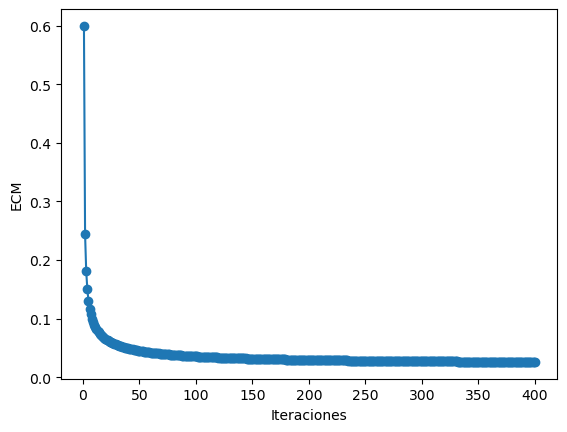

In [66]:
plt.plot(range(1, len(rn.errors_) + 1), rn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel(funcionCOSTO)
plt.show()

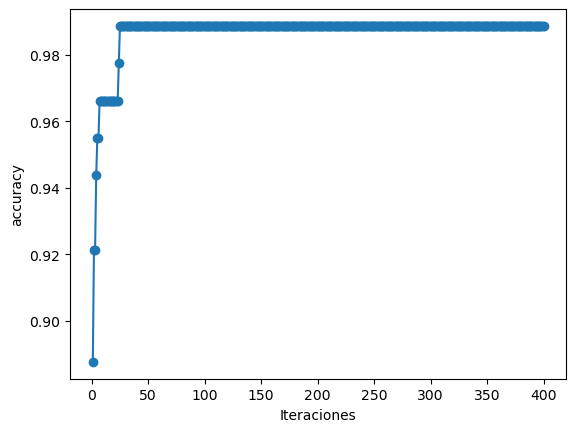

In [68]:
plt.plot(range(1, len(rn.accuracy_) + 1), rn.accuracy_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('accuracy')
plt.show()

In [70]:
#-- accuracy en entrenamiento y testeo ---
acc_Train = rn.accuracy(X_train, T_train)
acc_Test = rn.accuracy(X_test, T_test)
print("acc.Train = %.2f    acc.Test = %.2f" % (acc_Train, acc_Test))

acc.Train = 0.99    acc.Test = 0.93


### b) Función de activación ‘sigmoid’ y función de costo ‘EC_binaria’ (entropía cruzada binaria)

In [108]:
# Opciones para la función de activación: 'sigmoid', 'tanh' o 'softmax'
# Opciones para la función de costo : 'ECM', 'EC_binaria', 'EC'
# Combinaciones válidas: 'sigmoid'-'ECM', 'sigmoid'-'EC_binaria', 'tanh'-'ECM', 'softmax'-'EC'

funcion = 'sigmoid'  
funcionCOSTO = 'EC_binaria'

if (funcion == 'tanh'):
    T_train = 2*T_train-1
    T_test  = 2*T_test-1

rn = RNMulticlase(alpha=0.1, n_iter=400, cotaE=1e-06, FUN=funcion, COSTO=funcionCOSTO, random_state=None)
resul = rn.fit(X_train, T_train)

In [110]:
print("Pesos obtenidos\n")
print(rn.w_)
print(rn.b_)

Pesos obtenidos

[[ 2.52419603  1.39811901  1.30021424 -3.03754315 -0.4673097  -0.14518733
   2.4707802  -0.72014999  0.40943537  0.08551723  0.10859711  1.4660223
   3.14629299]
 [-2.1214327  -1.4143008  -3.25758288  2.39359391  1.0534967   2.13834328
  -1.2100659   0.32529332 -0.76139803 -4.19908413  1.07357482  1.84068505
  -4.53722646]
 [ 1.74546482  0.77683967  1.14922502  1.16051802 -0.12960674 -0.85170261
  -2.98186824 -0.32071721  0.0308941   3.14360493 -2.57019952 -3.29842558
   0.82673149]]
[[-3.61241031]
 [-5.96383597]
 [-4.87062987]]


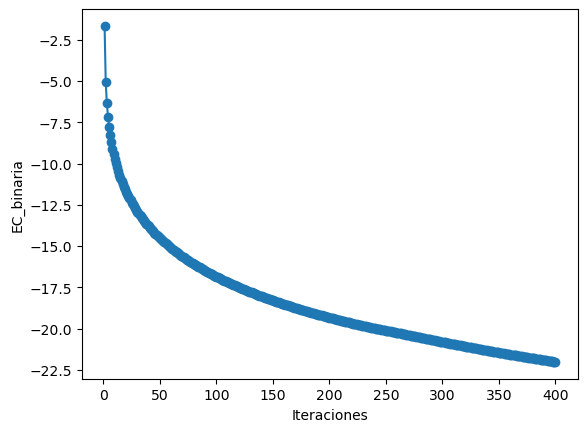

In [112]:
plt.plot(range(1, len(rn.errors_) + 1), rn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel(funcionCOSTO)
plt.show()

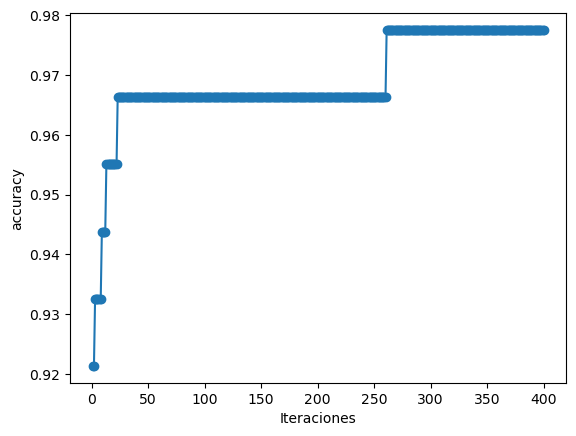

In [114]:
plt.plot(range(1, len(rn.accuracy_) + 1), rn.accuracy_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('accuracy')
plt.show()

In [116]:
#-- accuracy en entrenamiento y testeo ---
acc_Train = rn.accuracy(X_train, T_train)
acc_Test = rn.accuracy(X_test, T_test)
print("acc.Train = %.2f    acc.Test = %.2f" % (acc_Train, acc_Test))

acc.Train = 0.98    acc.Test = 0.94


### c) Función de activación ‘tanh’ y función de costo ‘ECM’ (error cuadrático medio)

### d) Capa ‘Softmax’ y función de costo ‘EC’ (entropía cruzada)